<a href="https://colab.research.google.com/github/andreidore/aicrowd_practice/blob/master/wineq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

In [2]:
!rm -rf data
!mkdir data
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/wineq/v0.1/test.csv
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/wineq/v0.1/train.csv
!mv train.csv data/train.csv
!mv test.csv data/test.csv

--2020-05-21 08:13:59--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/wineq/v0.1/test.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.11, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62223 (61K) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>]  60.76K   335KB/s    in 0.2s    

2020-05-21 08:14:00 (335 KB/s) - ‘test.csv’ saved [62223/62223]

--2020-05-21 08:14:01--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/wineq/v0.1/train.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.11, 130.117.252.16, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 20

In [4]:
all_data_path = "data/train.csv" #path where data is stored

all_data = pd.read_csv(all_data_path,header=None) #load data in dataframe using pandas

all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,8.4,0.40,0.70,13.1,0.042,29.0,197.0,0.99800,3.06,0.64,9.7,5
2,7.8,0.17,0.23,1.7,0.029,39.0,128.0,0.99272,3.37,0.41,10.7,7
3,6.2,0.18,0.49,4.5,0.047,17.0,90.0,0.99190,3.27,0.37,11.6,6
4,6.5,0.26,0.24,10.8,0.042,47.0,130.0,0.99600,3.08,0.40,10.1,6


In [9]:
all_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.858435,0.278051,0.334160,6.442407,0.045539,35.222818,138.300664,0.994051,3.187157,0.489377,10.507517,5.876723
std,0.835202,0.099147,0.121689,5.098740,0.020888,16.537835,42.061782,0.003004,0.149727,0.113204,1.232936,0.888392
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991753,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.275000,0.043000,34.000000,135.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,167.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.200000,9.000000


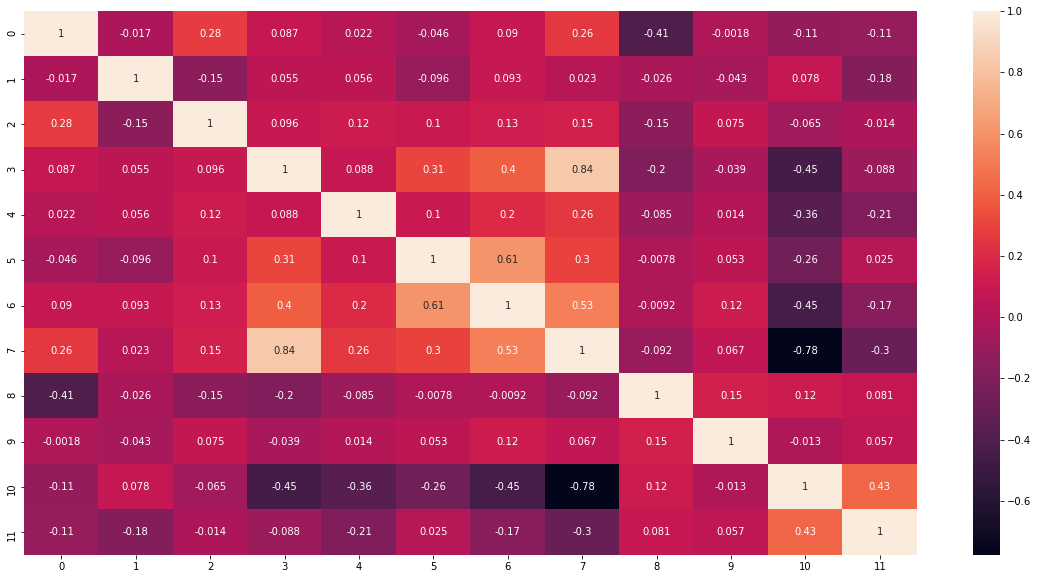

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(all_data.corr(), annot = True)

In [52]:
data=all_data.copy()

data=data.drop([7],axis=1)


data.head()

,0,1,2,3,4,5,6,8,9,10,11
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,8.4,0.40,0.70,13.1,0.042,29.0,197.0,3.06,0.64,9.7,5
2,7.8,0.17,0.23,1.7,0.029,39.0,128.0,3.37,0.41,10.7,7
3,6.2,0.18,0.49,4.5,0.047,17.0,90.0,3.27,0.37,11.6,6
4,6.5,0.26,0.24,10.8,0.042,47.0,130.0,3.08,0.40,10.1,6


In [0]:
X_train, X_val= train_test_split(data, test_size=0.2, random_state=42)
X_train,y_train = X_train.iloc[:,:-1],X_train.iloc[:,-1]
X_val,y_val = X_val.iloc[:,:-1],X_val.iloc[:,-1]

In [54]:
#classifier = SVC(gamma='auto')
#classifier=MLPClassifier(hidden_layer_sizes=(100,3))
classifier=RandomForestClassifier()
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)

precision = precision_score(y_val,y_pred,average='micro')
recall = recall_score(y_val,y_pred,average='micro')
accuracy = accuracy_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred,average='macro')

print("Accuracy of the model is :" ,accuracy)
print("Recall of the model is :" ,recall)
print("Precision of the model is :" ,precision)
print("F1 score of the model is :" ,f1)

Accuracy of the model is : 0.6594387755102041
Recall of the model is : 0.6594387755102041
Precision of the model is : 0.6594387755102041
F1 score of the model is : 0.4293386255348956


In [0]:
final_test_path = "data/test.csv"
final_test = pd.read_csv(final_test_path)


final_test.drop(final_test.columns[6],axis=1,inplace=True)

submission = classifier.predict(final_test)

submission = pd.DataFrame(submission)
submission.to_csv('submission.csv',header=['quality'],index=False)

In [0]:
from google.colab import files
files.download('submission.csv')